In [27]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('Data/Selected_Data.csv')

## Train-test splitting

In [4]:
X = data.drop(columns='diagnosis')
y = data['diagnosis']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

## Training the logistic regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

import matplotlib.pyplot as plt

### Model initialization

In [7]:
model = LogisticRegression(max_iter=1000, random_state=42)

### Model fitting

In [8]:
model.fit(X_train,y_train)

c:\Users\shunp\.conda\envs\py39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

### Forecasting test data

In [9]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:1]

In [10]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



### Confusion matrix

In [11]:
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))

Confusion Matrix:
[[72  0]
 [ 3 39]]


### Обчислення ROC-AUC

In [12]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_proba.shape


(114,)

In [13]:
roc_auc = roc_auc_score(y_test,y_pred_proba)
roc_auc

0.9930555555555555

In [14]:
fpr,tpr, threshholds = roc_curve(y_test,y_pred_proba)

### Graph

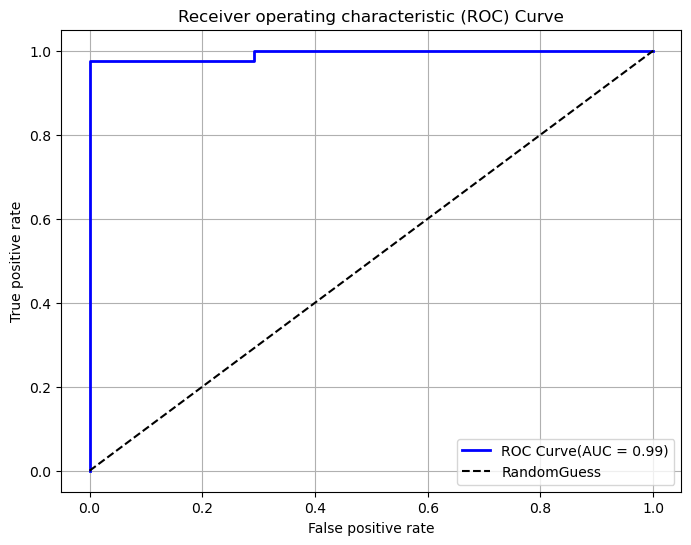

In [15]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label = f'ROC Curve(AUC = {roc_auc:.2f})', color='blue', linewidth=2)
plt.plot([0,1],[0,1],'k--', label='RandomGuess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Main metrics

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [17]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,pos_label=1)
recall = recall_score(y_test,y_pred,pos_label=1)
f1 = f1_score(y_test,y_pred,pos_label=1)

In [18]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Accuracy: 0.97
Precision: 1.00
Recall: 0.93
F1-Score: 0.96


Our model is great

## Logistic regression plot

### Taking 2 variables from a dataset

In [19]:
X_2_features = X_train.iloc[:,:2]

### Standartizing variables 

In [20]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
X_2_features = scaler.fit_transform(X_2_features)

### Training the model on standartized variables

In [23]:
model_scaled = LogisticRegression()
model_scaled.fit(X_2_features, y_train)

LogisticRegression()

### Plot

In [30]:
x_min, x_max = X_2_features[:,0].min() - 1, X_2_features[:,0].max() + 1
y_min, y_max = X_2_features[:,1].min() - 1, X_2_features[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),  np.arange(y_min, y_max, 0.01))

In [31]:
Z = model_scaled.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

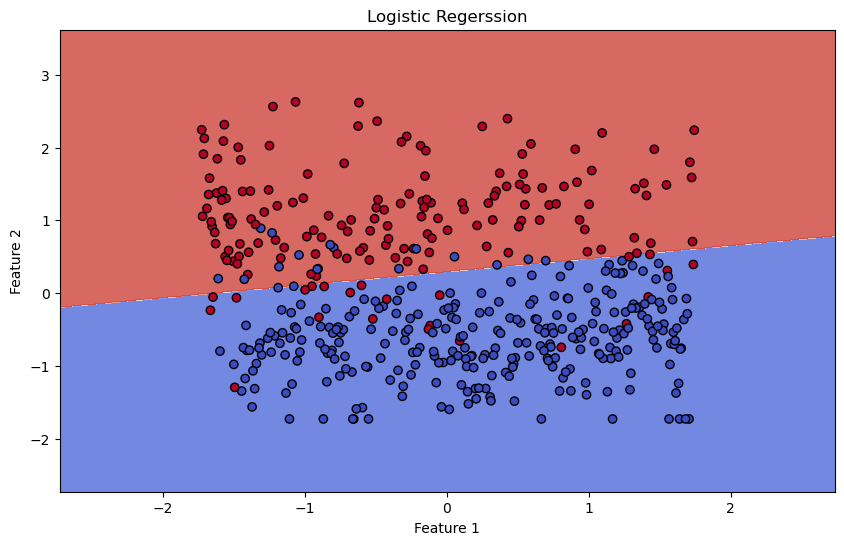

In [34]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')  # Зони для класів
plt.scatter(X_2_features[:, 0], X_2_features[:, 1], c=y_train, edgecolors='k', cmap='coolwarm')  # Точки
plt.title("Logistic Regerssion")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()